In [1]:
import pandas as pd
import numpy as np

# Data loading 

In [2]:
df = pd.read_excel(r'C:\Users\KIIT\OneDrive\Desktop\hotel booking\DataAnalyst_Assesment_Dataset.xlsx')

In [3]:
df.head()

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,NaN,NaN,10:00:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,NaN,NaN,11:00:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,NaN,NaN,12:00:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,NaN,15:00:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking ID         1000 non-null   object        
 1   Customer ID        1000 non-null   object        
 2   Customer Name      1000 non-null   object        
 3   Booking Type       1000 non-null   object        
 4   Booking Date       1000 non-null   datetime64[ns]
 5   Status             1000 non-null   object        
 6   Class Type         328 non-null    object        
 7   Instructor         270 non-null    object        
 8   Time Slot          795 non-null    object        
 9   Duration (mins)    795 non-null    float64       
 10  Price              1000 non-null   float64       
 11  Facility           672 non-null    object        
 12  Theme              273 non-null    object        
 13  Subscription Type  0 non-null      float64       
 14  Service N

# Data Cleaning

In [5]:
df.isnull().sum()

Booking ID              0
Customer ID             0
Customer Name           0
Booking Type            0
Booking Date            0
Status                  0
Class Type            672
Instructor            730
Time Slot             205
Duration (mins)       205
Price                   0
Facility              328
Theme                 727
Subscription Type    1000
Service Name            0
Service Type            0
Customer Email         94
Customer Phone        105
dtype: int64

In [6]:
df = df.drop(columns=['Subscription Type'])
# dropping subsctiption

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Booking ID       1000 non-null   object        
 1   Customer ID      1000 non-null   object        
 2   Customer Name    1000 non-null   object        
 3   Booking Type     1000 non-null   object        
 4   Booking Date     1000 non-null   datetime64[ns]
 5   Status           1000 non-null   object        
 6   Class Type       328 non-null    object        
 7   Instructor       270 non-null    object        
 8   Time Slot        795 non-null    object        
 9   Duration (mins)  795 non-null    float64       
 10  Price            1000 non-null   float64       
 11  Facility         672 non-null    object        
 12  Theme            273 non-null    object        
 13  Service Name     1000 non-null   object        
 14  Service Type     1000 non-null   object  

In [8]:
df['Customer Email'].fillna('not provided',inplace= True)
df['Customer Phone'].fillna('not provided',inplace= True)

df[['Customer Email', 'Customer Phone']].isnull().sum()

#handeling the null values in email and phone column

Customer Email    0
Customer Phone    0
dtype: int64

In [9]:
df.isnull().sum()

Booking ID           0
Customer ID          0
Customer Name        0
Booking Type         0
Booking Date         0
Status               0
Class Type         672
Instructor         730
Time Slot          205
Duration (mins)    205
Price                0
Facility           328
Theme              727
Service Name         0
Service Type         0
Customer Email       0
Customer Phone       0
dtype: int64

In [10]:
duplicate_bookings = df.duplicated(subset=['Booking ID'], keep=False)
duplicate_customers = df.duplicated(subset=['Customer ID'], keep=False)

print("Duplicate Booking IDs:", duplicate_bookings.sum())
print("Duplicate Customer IDs:", duplicate_customers.sum())
# checking if any dupicate values are there.


Duplicate Booking IDs: 0
Duplicate Customer IDs: 0


In [11]:
df = df[~((df['Status'] == 'Pending') & 
          (df['Time Slot'].isna()) & 
          (df['Duration (mins)'].isna()) & 
          (df['Price'] == 0))]
#dropping few rows with null values

In [12]:
df.isnull().sum()

Booking ID           0
Customer ID          0
Customer Name        0
Booking Type         0
Booking Date         0
Status               0
Class Type         662
Instructor         719
Time Slot          191
Duration (mins)    191
Price                0
Facility           324
Theme              716
Service Name         0
Service Type         0
Customer Email       0
Customer Phone       0
dtype: int64

In [13]:
df['Class Type'] = df.groupby('Service Name')['Class Type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))
df['Instructor'] = df.groupby('Service Name')['Instructor'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))
#fulling null values in class type and instructor column

In [14]:
df['Facility'] = df.groupby('Service Name')['Facility'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Not Specified"))
#fulling null values in facility column

In [50]:
df['Theme'] = df.apply(lambda x: x['Theme'] if pd.notna(x['Theme']) else 
                       ("Default" if x['Service Type'] != "Birthday Party" else "Default Theme"), axis=1)

##fulling null values in theme column


In [16]:
df.isnull().sum()

Booking ID           0
Customer ID          0
Customer Name        0
Booking Type         0
Booking Date         0
Status               0
Class Type           0
Instructor           0
Time Slot          191
Duration (mins)    191
Price                0
Facility             0
Theme                0
Service Name         0
Service Type         0
Customer Email       0
Customer Phone       0
dtype: int64

In [18]:
df['Time Slot'] = df.groupby('Service Name')['Time Slot'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))
df['Duration (mins)'] = df.groupby('Service Name')['Duration (mins)'].transform(lambda x: x.fillna(x.median()))
# taking mean and mode for duration and time slot column grouping by service name.


In [19]:
df.isnull().sum()

Booking ID         0
Customer ID        0
Customer Name      0
Booking Type       0
Booking Date       0
Status             0
Class Type         0
Instructor         0
Time Slot          0
Duration (mins)    0
Price              0
Facility           0
Theme              0
Service Name       0
Service Type       0
Customer Email     0
Customer Phone     0
dtype: int64

In [23]:
df['Booking Date'] = pd.to_datetime(df['Booking Date'], errors='coerce').dt.date



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Booking ID       986 non-null    object 
 1   Customer ID      986 non-null    object 
 2   Customer Name    986 non-null    object 
 3   Booking Type     986 non-null    object 
 4   Booking Date     986 non-null    object 
 5   Status           986 non-null    object 
 6   Class Type       986 non-null    object 
 7   Instructor       986 non-null    object 
 8   Time Slot        986 non-null    object 
 9   Duration (mins)  986 non-null    float64
 10  Price            986 non-null    float64
 11  Facility         986 non-null    object 
 12  Theme            986 non-null    object 
 13  Service Name     986 non-null    object 
 14  Service Type     986 non-null    object 
 15  Customer Email   986 non-null    object 
 16  Customer Phone   986 non-null    object 
dtypes: float64(2), o

In [25]:
for col in ['Booking Type', 'Status', 'Class Type', 'Instructor', 'Facility', 'Service Type']:
    print(f"{col} unique values:\n", df[col].unique(), "\n")

    

Booking Type unique values:
 ['Facility' 'Birthday Party' 'Class'] 

Status unique values:
 ['Pending' 'Confirmed'] 

Class Type unique values:
 ['Unknown' 'Art' 'Dance' 'Gymnastics'] 

Instructor unique values:
 ['Unknown' 'Amanda Davis' 'Lisa Hensley' 'James Howard'] 

Facility unique values:
 ['Party Room' 'Play Area' 'Not Specified'] 

Service Type unique values:
 ['Facility' 'Birthday Party' 'Class'] 



In [26]:
df['Duration (mins)'] = pd.to_numeric(df['Duration (mins)'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [31]:
df['Booking Date'] = pd.to_datetime(df['Booking Date'], errors='coerce')

In [27]:
categorical_cols = ['Booking Type', 'Status', 'Class Type', 'Instructor', 'Facility', 'Theme', 'Service Name', 'Service Type']
df[categorical_cols] = df[categorical_cols].astype('category')


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 985
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Booking ID       986 non-null    object        
 1   Customer ID      986 non-null    object        
 2   Customer Name    986 non-null    object        
 3   Booking Type     986 non-null    category      
 4   Booking Date     986 non-null    datetime64[ns]
 5   Status           986 non-null    category      
 6   Class Type       986 non-null    category      
 7   Instructor       986 non-null    category      
 8   Time Slot        986 non-null    object        
 9   Duration (mins)  986 non-null    float64       
 10  Price            986 non-null    float64       
 11  Facility         986 non-null    category      
 12  Theme            986 non-null    category      
 13  Service Name     986 non-null    category      
 14  Service Type     986 non-null    category 

In [42]:
avg_price_grouped = df[df['Price'] > 0].groupby(['Booking Type', 'Service Name'])['Price'].mean().reset_index()
avg_price_grouped.rename(columns={'Price': 'Avg_Price'}, inplace=True)


df = df.merge(avg_price_grouped, on=['Booking Type', 'Service Name'], how='left')

df['Price'] = df.apply(lambda row: row['Avg_Price'] if row['Price'] == 0 else row['Price'], axis=1)

df.drop(columns=['Avg_Price'], inplace=True)

df[df['Price'] == 0]

# filling null values in price column (by avg price).


,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Service Name,Service Type,Customer Email,Customer Phone


# EDA


In [44]:
df.describe()

,Duration (mins),Price
count,986.000000,986.000000
mean,85.496957,157.571905
std,27.368634,77.877137
min,45.000000,15.250000
25%,45.000000,95.722500
50%,90.000000,159.477732
75%,120.000000,220.742500
max,120.000000,299.760000


<AxesSubplot:title={'center':'Monthly Booking Trends'}>

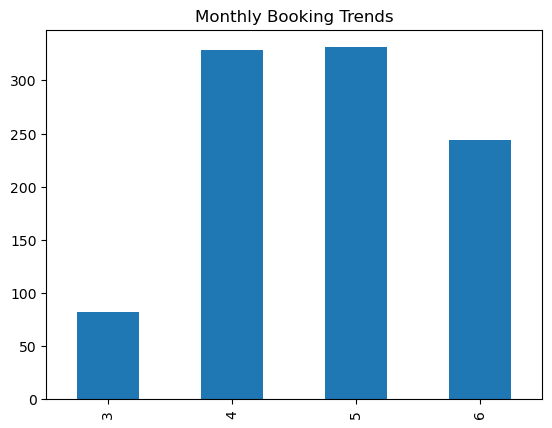

In [45]:

df['Booking Date'] = pd.to_datetime(df['Booking Date']) 
df['Booking Date'].dt.month.value_counts().sort_index().plot(kind='bar', title="Monthly Booking Trends")



<AxesSubplot:title={'center':'Booking Type Distribution'}>

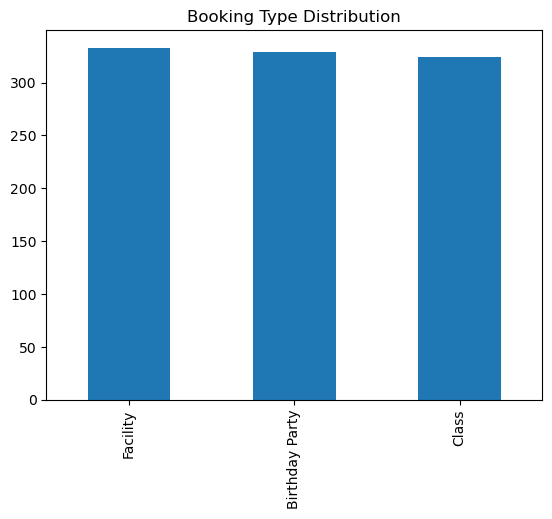

In [46]:
df['Booking Type'].value_counts().plot(kind='bar', title="Booking Type Distribution")


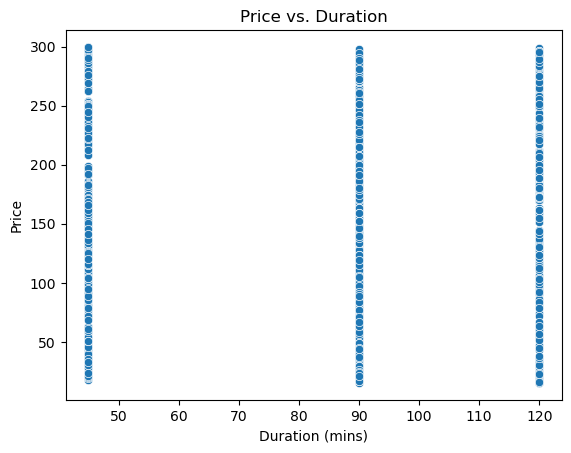

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Duration (mins)'], y=df['Price'])
plt.title("Price vs. Duration")
plt.show()


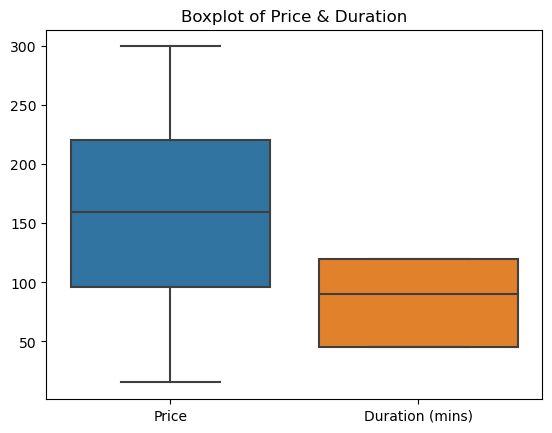

In [48]:
sns.boxplot(data=df[['Price', 'Duration (mins)']])
plt.title("Boxplot of Price & Duration")
plt.show()



In [49]:
df.to_excel(r"C:\Users\KIIT\OneDrive\Desktop\hotel booking\cleaned_booking_data.xlsx", index=False)

# saving the cleaned data set
